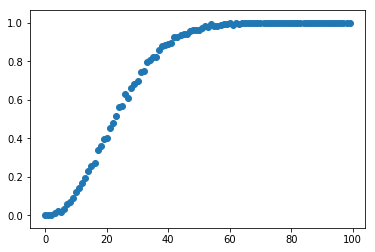

'done'

In [23]:
import pandas as pd
import random
import matplotlib.pyplot as plt
athletes = pd.read_csv('./athletes.csv')
athletes = athletes[athletes['dob'].notnull()]
birthdays = []

for i in athletes['dob']:
    arr = i.split("/")
    birthdays.append([arr[0], arr[1]])
    
def ifparadox(samplesize):
    rand_smpl = [ birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize)) ]
    s = set()
    for i in rand_smpl:
        s.add(str(i[0] + '/' + i[1]))
    if len(s) != samplesize:
        return True
    return False

def classicparadox(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if ifparadox(samplesize):
            counter += 1
    return counter/trialsize

def plot():
    samplesize = []
    probability = []
    for i in range(100):
        samplesize.append(i)
        probability.append(classicparadox(1000, i))
    plt.scatter(samplesize, probability)
    plt.show()
    return "done"

plot()